# Power spectral density of the SOI
Compute the power spectral density function of the Southern Oscillation Index (SOI).  
The SOI is calculated using the pressure differences between Tahiti and Darwin, and it can explain ENSO events.

In [1]:
import numpy as np
import scipy.io as sio
import scipy.signal as ss
import matplotlib.pyplot as plt
from scipy.fftpack import fft    # using fft function in Scipy package
import pandas as pd
# %matplotlib qt

In [2]:
# Do we want to normalized power spectral density function, set normalized=True
normalized = False

Read the data

In [3]:
data2 = sio.loadmat('soi.mat', squeeze_me=True, struct_as_record=False)
soi = data2['soi']          # monthly mean values
soit = data2['soit']        # unit in days
dsoi = soi - soi.mean()     # Remove the mean


Let's plot the data first.

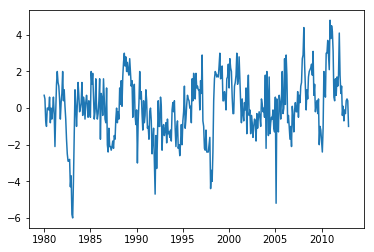

In [4]:
plt.plot(soit/365.25, soi)

### Fourier transform

In [5]:
# Number of sample points
N = len(soi)
# sample spacing
dt = 1                         # in the unit of months

In [6]:
# frequencies
delf = 1/(N*dt)
freq = np.arange(0, 1/(2*dt)+delf, delf)
nfreq = np.arange(-(N//2-1)/N/dt, -1/N/dt, delf)
f = np.concatenate((freq, nfreq))

In [7]:
c = fft(dsoi)        # Usually done in
if normalized is True:
    c = c/N          # This is what we did in the class


# psd = 2*delf*np.abs(c[:(N//2+1)])**2
psd = delf*np.real(c * c.conj())

/Users/hajsong/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


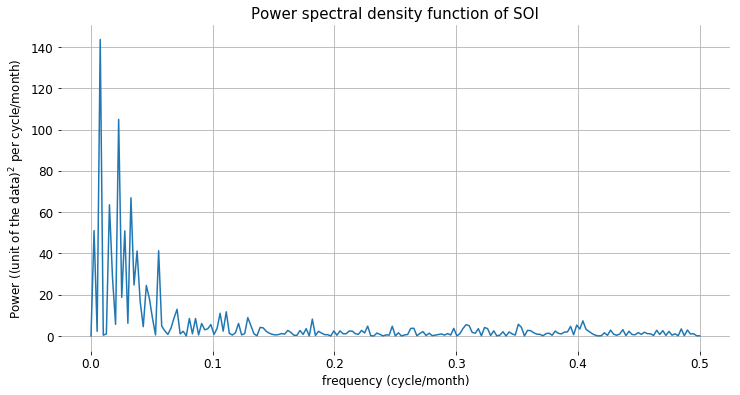

In [8]:
# plt.style.use('seaborn')

f, ax = plt.subplots(1, figsize = (12,6))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# ax.plot(freq, psd)
ax.plot(freq, 2*psd[:(N//2+1)])    # Plot the part only with non-negative frequencies
ax.grid('on')
ax.set_title('Power spectral density function of SOI', fontsize=15)
ax.set_xlabel('frequency (cycle/month)', fontsize=12)
ax.set_ylabel('Power ((unit of the data)$^2$ per cycle/month)', fontsize=12)
ax.tick_params(labelsize=12)

### Total power
The total power in the time space and the frequency space has to be the same.
$$
P = \frac{1}{N} \mathbf{d}^T \mathbf{d} = \mathbf{c}^H\mathbf{c}
$$


In [9]:
P_t=sum(soi**2)/N
if normalized is True:
    P_f = np.sum(c*c.conj())
else:
    P_f = np.sum(c*c.conj())/N**2

print('Total power in the time space = '+str(P_t))
print('Total power in the frequency space = '+str(np.real(P_f)))

Total power in the time space = 2.7399747474747485
Total power in the frequency space = 2.7348675517804297
